# ME1 


## Exploratory Data Analysis

- See the examples of basic visualization and Pandas on Canvas. 

#### Write full names of your team members here.

- Sophia Luehmann

- Gabriel Suarez


## Advertising data

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

A toy dataset for your exploratory data analysis:

./data/Advertising.csv

In [36]:
import pandas as pd

# read CSV file stored in the current directory and save the results
data = pd.read_csv('./data/Advertising.csv', skipinitialspace=True, index_col=0)

# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
3/11/19,230.1,37.8,69.2,22.1
3/12/19,44.5,39.3,45.1,10.4
3/13/19,17.2,45.9,69.3,9.3
3/14/19,151.5,41.3,58.5,18.5
3/15/19,180.8,10.8,58.4,12.9


What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

In [37]:
#display all data. You can uncomment the code in the next line

display(data)

data.shape

,TV,Radio,Newspaper,Sales
3/11/19,230.1,37.8,69.2,22.1
3/12/19,44.5,39.3,45.1,10.4
3/13/19,17.2,45.9,69.3,9.3
3/14/19,151.5,41.3,58.5,18.5
3/15/19,180.8,10.8,58.4,12.9
...,...,...,...,...
9/22/19,38.2,3.7,13.8,7.6
9/23/19,94.2,4.9,8.1,9.7
9/24/19,177.0,9.3,6.4,12.8
9/25/19,283.6,42.0,66.2,25.5


(200, 4)

## Part 1 Tasks

Solve each of the following problems. 
- Check the example Python codes for data visualization and pandas DataFrame examples: EX1_pandas.zip on Week1 Synopsis in Canvas.

(1) For each field of the data, what is the mean of the data? What is the median? Are there any dataset has mode value? 

(2) For each field of the data, give the five-number summary, minimum, the first quartile (Q1), median, the third quartile (Q3), and maximum of the data.

(3) For each field of the data, visulize a boxplot of the data and compare it to your answer in (b). 

(4) For Sales, visualize distribution of the data using histogram. Comment on the data’s modality (i.e., bimodal, trimodal, etc.)

(5) For Sales, visualize the trend of the data over time using a graph. 

(6) For each pair (TV-Sales, Radio-Sales, Newspaper-Sales), calculate the Pearson's correlation coefficient factor r. 

(7) For each pair (TV-Sales, Radio-Sales, Newspaper-Sales), visualize scatter graph. 

(8) Discuss what the differences are between the three: (1) boxplot, (2) histogram, and (3) scatter plot with respect to your founding. 

In [82]:
import statistics
for col in data.columns:
    print(col)
    print("Mean:")
    print(statistics.mean(data.loc[:,col].tolist()))
    print("\nMedian:")
    print(statistics.median(data.loc[:,col].tolist()))
    print("\nMode:")
    print(statistics.mode(data.loc[:,col].tolist()), "\n")

TV
Mean:
147.0425

Median:
149.75

Mode:
17.2 

Radio
Mean:
23.264

Median:
22.9

Mode:
4.1 

Newspaper
Mean:
30.554

Median:
25.75

Mode:
9.3 

Sales
Mean:
14.022499999999999

Median:
12.9

Mode:
9.7 



In [105]:
df = pd.DataFrame(data)
df.describe().loc[['min','25%','50%','75%','max']]

,TV,Radio,Newspaper,Sales
min,0.700,0.000,0.30,1.600
25%,74.375,9.975,12.75,10.375
50%,149.750,22.900,25.75,12.900
75%,218.825,36.525,45.10,17.400
max,296.400,49.600,114.00,27.000


<AxesSubplot:>

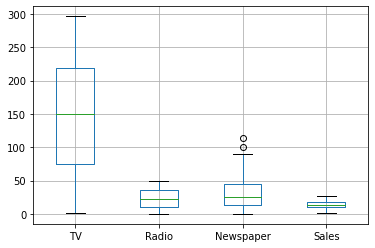

In [73]:
df.boxplot(column=['TV','Radio','Newspaper','Sales'])

These boxplots give us a cleaner view of the values in question 2, as well as allowing us to see outliers,
at the cost of precision.

<AxesSubplot:>

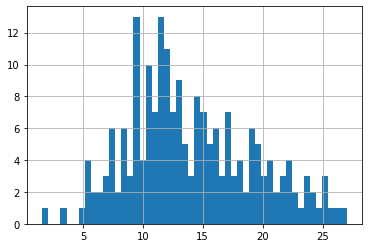

In [79]:
data.loc[:,'Sales'].hist(bins = 50)

<AxesSubplot:xlabel='Date', ylabel='Sales'>

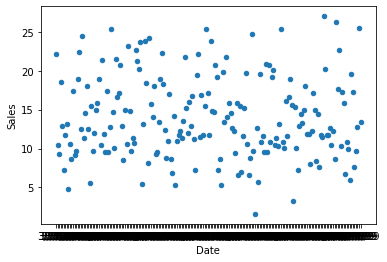

In [92]:
df['Date'] = df.index
df.plot(kind='scatter', x='Date', y='Sales')

In [99]:
print(df['TV'].corr(df['Sales'],method='pearson'))
print(df['Radio'].corr(df['Sales'],method='pearson'))
print(df['Newspaper'].corr(df['Sales'],method='pearson'))

0.7822244248616064
0.5762225745710553
0.22829902637616536


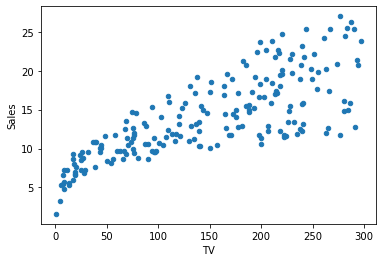

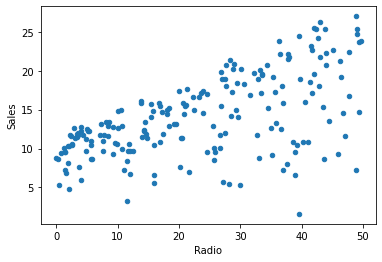

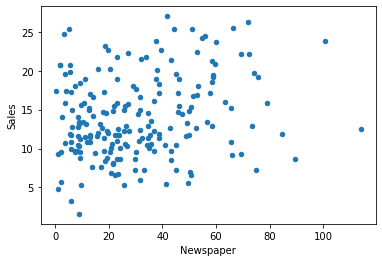

In [101]:
tv_sales = df.plot.scatter(x='TV',y='Sales')
radio_sales = df.plot.scatter(x='Radio',y='Sales')
newspaper_sales = df.plot.scatter(x='Newspaper',y='Sales')

The scatter plot allows us to see trends and that the TV sales distribution seems to be the closest to having 
a readily identifiable one, and that the Newspaper sales distribution is the most sporadic. The box plots 
allows us to view the range of values for each more readily, while abstracting away the number of 
recorded sales events and allowing us to quickly identify any outliers (such as those present in the 
newspaper boxplot). The histogram focuses more on the number of times a particular sales yield was recorded, unlike the boxplots that hide this information

## Part 2
Write a summary of what you find from the data and submit the report to Canvas. 

When looking at the statistics for each category, we are able to see that, on average, the most money is spent on TV advertisements. About 5x less  and 7x less is spent on ads for newspaper and radio, respectively. The result of these ads is about 14,000 sales per day on average.

The box plots show that the median advertising dollars is significantly greater than radio and newspaper, which have relatively similar median advertising dollars. TV and radio have no skew whereas newspaper is slightly right-skew, showing the distribution of days in which more than the median was spent on ads. The box plot for newspaper also shows that there are outliers in which significantly more money was spent on ads on some days.

The histogram for sales shows that there are mostly between 9,000 and 13,000 sales per day. 

Looking at sales over time, a trend is unable to be established as shown in the scatterplot. 

The Pearson correlation between TV and sales is the greatest at .78, followed by radio at .58, and then newspaper at .23. This indicates that there is a relatively strong association between sales and TV advertisement dollars spent and weak association between sales and newspaper advertisement dollars spent.

### Resources

#### Boxplot
https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51


- matplotlib.pyplot boxplot demo
https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html


#### matplotlib.pyplot
- scatter plot
https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.scatter.html


- histogram plot
https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.hist.html


#### pandas DataFrame
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html


- describe()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html


- corr()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html


- hist()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html


- plot.scatter()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html


- pivot()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html